In [3]:
import sys
sys.path.append('../')


import numpy as np
import pandas as pd

import torch
from sklearn.decomposition import PCA

import scDART.utils as utils
import scDART.TI as ti
import scDART

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train model

In [4]:
# all in one
seeds = [0]
latent_dim = 4
learning_rate = 3e-4
n_epochs = 500
use_anchor = False
reg_d = 1
reg_g = 1
reg_mmd = 1
ts = [30, 50, 70]
use_potential = True

counts_rna = pd.read_csv("../data/hema/counts_rna.csv", index_col = 0)
counts_atac = pd.read_csv("../data/hema/counts_atac.csv", index_col = 0)
label_rna = pd.read_csv("../data/hema/anno_rna.txt", header = None)
label_atac = pd.read_csv("../data/hema/anno_atac.txt", header = None)
coarse_reg = pd.read_csv("../data/hema/region2gene.csv", sep = ",", index_col = 0).values
# print(counts_rna.shape[0], counts_rna.shape[1])
# print(counts_atac.shape[0], counts_atac.shape[1])
# print(label_rna.shape[0], label_rna.shape[1])
# print(label_atac.shape[0], label_atac.shape[1])
# print(coarse_reg.shape[0], coarse_reg.shape[1])


scDART_op = scDART.scDART(n_epochs = n_epochs, latent_dim = latent_dim, \
        ts = ts, use_anchor = use_anchor, use_potential = use_potential, k = 10, \
        reg_d = 1, reg_g = 1, reg_mmd = 1, l_dist_type = 'kl', seed = seeds[0],\
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

scDART_op = scDART_op.fit(rna_count = counts_rna.values, atac_count = counts_atac.values, reg = coarse_reg, rna_anchor = None, atac_anchor = None)
z_rna, z_atac = scDART_op.transform(rna_count = counts_rna.values, atac_count = counts_atac.values, rna_anchor = None, atac_anchor = None)


Loaded Dataset
running time(sec): 10.191446542739868
running time(sec): 1.3338711261749268
running time(sec): 1.3779516220092773
running time(sec): 0.9353158473968506
running time(sec): 0.8476345539093018
running time(sec): 0.8469510078430176
epoch:  0
	 mmd loss: 0.038
	 ATAC dist loss: 0.703
	 RNA dist loss: 0.418
	 gene activity loss: 5904.930
	 anchor matching loss: 0.000
epoch:  100
	 mmd loss: 0.029
	 ATAC dist loss: 0.032
	 RNA dist loss: 0.023
	 gene activity loss: 24.802
	 anchor matching loss: 0.000
epoch:  200
	 mmd loss: 0.026
	 ATAC dist loss: 0.023
	 RNA dist loss: 0.019
	 gene activity loss: 14.386
	 anchor matching loss: 0.000
epoch:  300
	 mmd loss: 0.026
	 ATAC dist loss: 0.018
	 RNA dist loss: 0.018
	 gene activity loss: 10.062
	 anchor matching loss: 0.000
epoch:  400
	 mmd loss: 0.025
	 ATAC dist loss: 0.018
	 RNA dist loss: 0.018
	 gene activity loss: 7.439
	 anchor matching loss: 0.000
epoch:  500
	 mmd loss: 0.026
	 ATAC dist loss: 0.018
	 RNA dist loss: 0.017
	

In [3]:
# import scDART.diffusion_dist as diff
# import scDART.dataset as dataset
# import scDART.model as model
# import scDART.loss as loss
# import scDART.train as train
# import scDART.post_align as palign
# import scDART.benchmark as bmk

# # step by step
# seeds = [0]
# latent_dim = 4
# learning_rate = 3e-4
# n_epochs = 500
# use_anchor = False
# reg_d = 1
# reg_g = 1
# reg_mmd = 1
# ts = [30, 50, 70]
# use_potential = True

# seed = seeds[0]
# print("Random seed: " + str(seed))
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# np.random.seed(seed)

# counts_rna = pd.read_csv("../data/Endo/counts_rna.csv", index_col = 0)
# counts_atac = pd.read_csv("../data/Endo/counts_atac.csv", index_col = 0)
# label_rna = pd.read_csv("../data/Endo/anno_rna.txt", header = None)
# label_atac = pd.read_csv("../data/Endo/anno_atac.txt", header = None)
# rna_dataset = dataset.dataset(counts = counts_rna.values, anchor = None)
# atac_dataset = dataset.dataset(counts = counts_atac.values, anchor = None)
# coarse_reg = torch.FloatTensor(pd.read_csv("../data/Endo/region2gene.csv", sep = ",", index_col = 0).values).to(device)

# batch_size = int(max([len(rna_dataset),len(atac_dataset)])/4)

# train_rna_loader = DataLoader(rna_dataset, batch_size = batch_size, shuffle = True)
# train_atac_loader = DataLoader(atac_dataset, batch_size = batch_size, shuffle = True)


# EMBED_CONFIG = {
#     'gact_layers': [atac_dataset.counts.shape[1], 1024, 512, rna_dataset.counts.shape[1]], 
#     'proj_layers': [rna_dataset.counts.shape[1], 512, 128, latent_dim], # number of nodes in each 
#     'learning_rate': learning_rate,
#     'n_epochs': n_epochs + 1,
#     'use_anchor': use_anchor,
#     'reg_d': reg_d,
#     'reg_g': reg_g,
#     'reg_mmd': reg_mmd,
#     'l_dist_type': 'kl',
#     'device': device
# }


# # calculate the diffusion distance
# dist_rna = diff.diffu_distance(rna_dataset.counts.numpy(), ts = ts,
#                                 use_potential = use_potential, dr = "pca", n_components = 30)

# dist_atac = diff.diffu_distance(atac_dataset.counts.numpy(), ts = ts,
#                                 use_potential = use_potential, dr = "lsi", n_components = 30)


# dist_rna = dist_rna/np.linalg.norm(dist_rna)
# dist_atac = dist_atac/np.linalg.norm(dist_atac)
# dist_rna = torch.FloatTensor(dist_rna).to(device)
# dist_atac = torch.FloatTensor(dist_atac).to(device)

# # initialize the model
# gene_act = model.gene_act(features = EMBED_CONFIG["gact_layers"], dropout_rate = 0.0, negative_slope = 0.2).to(device)
# encoder = model.Encoder(features = EMBED_CONFIG["proj_layers"], dropout_rate = 0.0, negative_slope = 0.2).to(device)
# model_dict = {"gene_act": gene_act, "encoder": encoder}

# opt_genact = torch.optim.Adam(gene_act.parameters(), lr = learning_rate)
# opt_encoder = torch.optim.Adam(encoder.parameters(), lr = learning_rate)
# opt_dict = {"gene_act": opt_genact, "encoder": opt_encoder}

# # training models
# train.match_latent(model = model_dict, opts = opt_dict, dist_atac = dist_atac, dist_rna = dist_rna, 
#                 data_loader_rna = train_rna_loader, data_loader_atac = train_atac_loader, n_epochs = EMBED_CONFIG["n_epochs"], 
#                 reg_mtx = coarse_reg, reg_d = EMBED_CONFIG["reg_d"], reg_g = EMBED_CONFIG["reg_g"], reg_mmd = EMBED_CONFIG["reg_mmd"], use_anchor = EMBED_CONFIG["use_anchor"], norm = "l1", 
#                 mode = EMBED_CONFIG["l_dist_type"])

# with torch.no_grad():
#     z_rna = model_dict["encoder"](rna_dataset.counts.to(device)).cpu().detach()
#     z_atac = model_dict["encoder"](model_dict["gene_act"](atac_dataset.counts.to(device))).cpu().detach()


# with torch.no_grad():
#     z_rna, z_atac = palign.match_alignment(z_rna = z_rna, z_atac = z_atac, k = 10)
#     z_atac, z_rna = palign.match_alignment(z_rna = z_atac, z_atac = z_rna, k = 10)


# Plot results

None
None


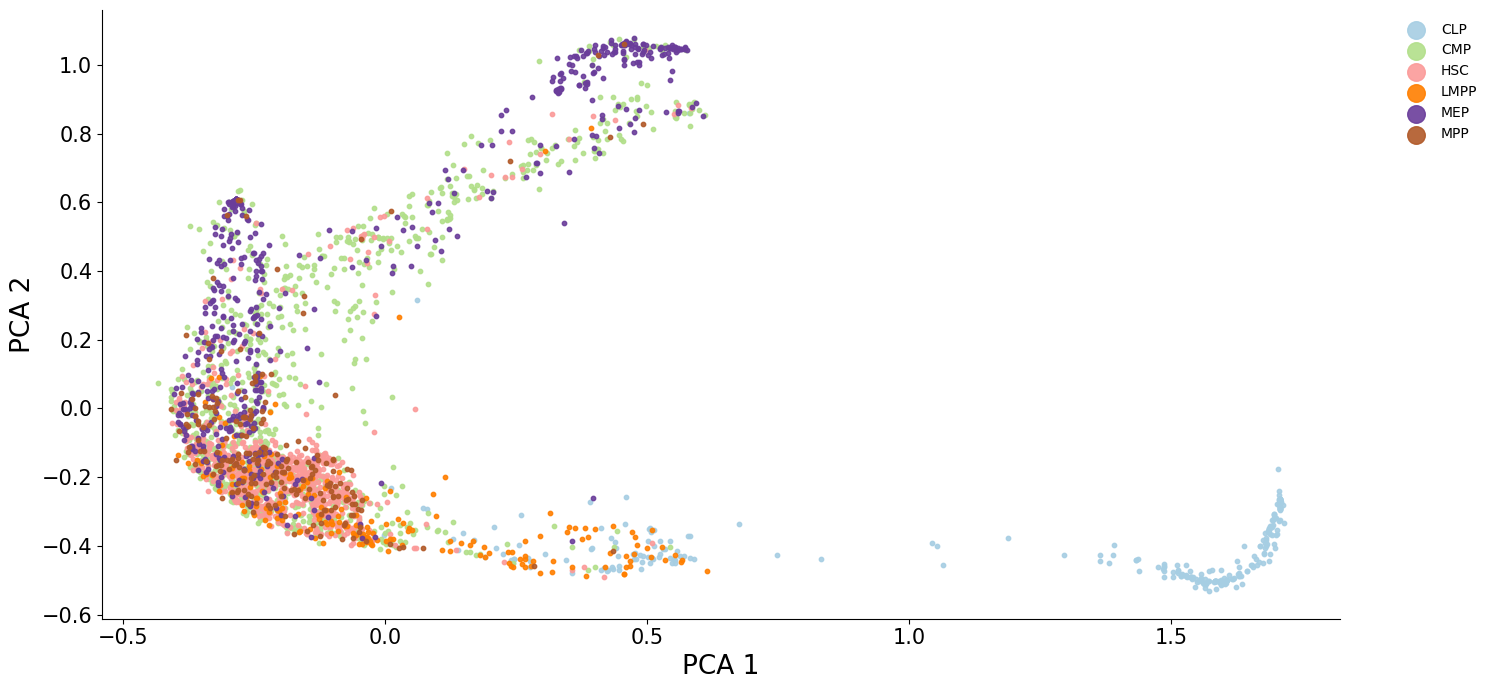

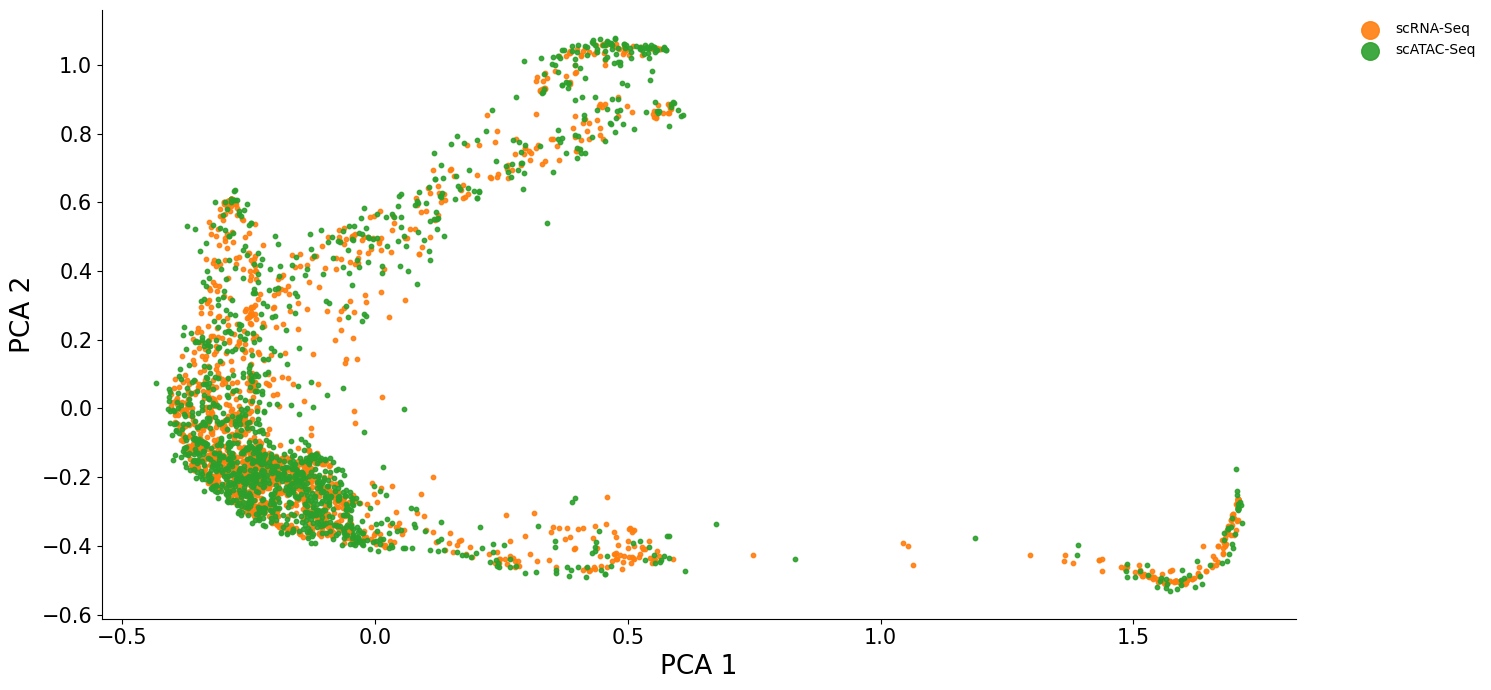

In [5]:
# post-maching
pca_op = PCA(n_components = 2)
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna_pca = z[:z_rna.shape[0],:]
z_atac_pca = z[z_rna.shape[0]:,:]
_ = utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                    anno2 = label_atac, mode = "joint", save = None, 
                    figsize = (15,7), axis_label = "PCA")
_ = utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                    anno2 = label_atac, mode = "modality", save = None, 
                    figsize = (15,7), axis_label = "PCA")


# Infer trajectory

running Leiden clustering
finished
None


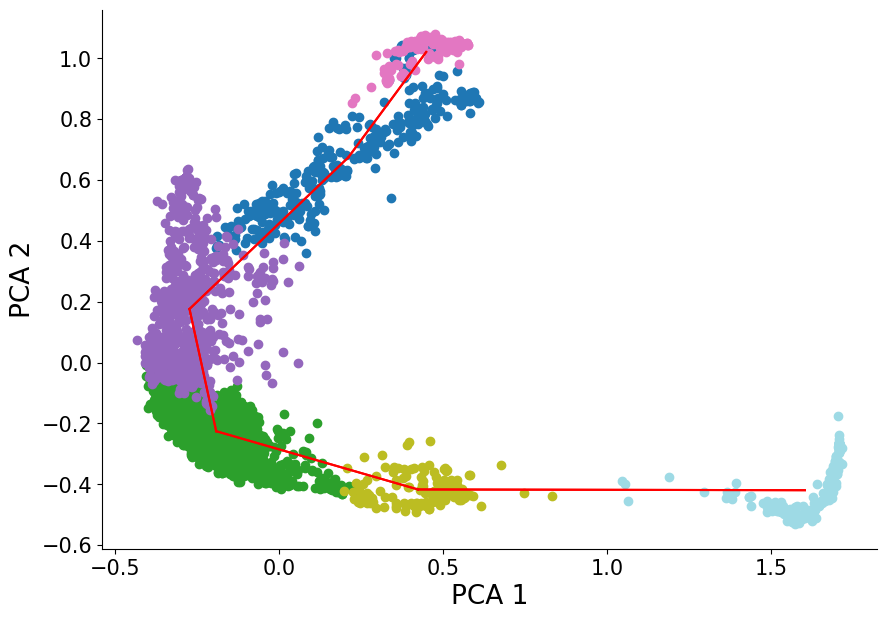

In [6]:
# define the root cell
root_cell = 35
# infer the trajectory backbone 
groups, mean_cluster, T = ti.backbone_inf(np.concatenate((z_rna, z_atac), axis = 0), resolution = 0.05)

        
pca_op = PCA(n_components = 2) 
z = pca_op.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna_pca = z[:z_rna.shape[0],:]
z_atac_pca = z[z_rna.shape[0]:,:]    
mean_cluster = pca_op.transform(np.array(mean_cluster))
utils.plot_backbone(z_rna_pca, z_atac_pca, groups = groups, T = T, mean_cluster = mean_cluster, mode = "joint", figsize=(10,7), save = None, axis_label = "PCA")


None


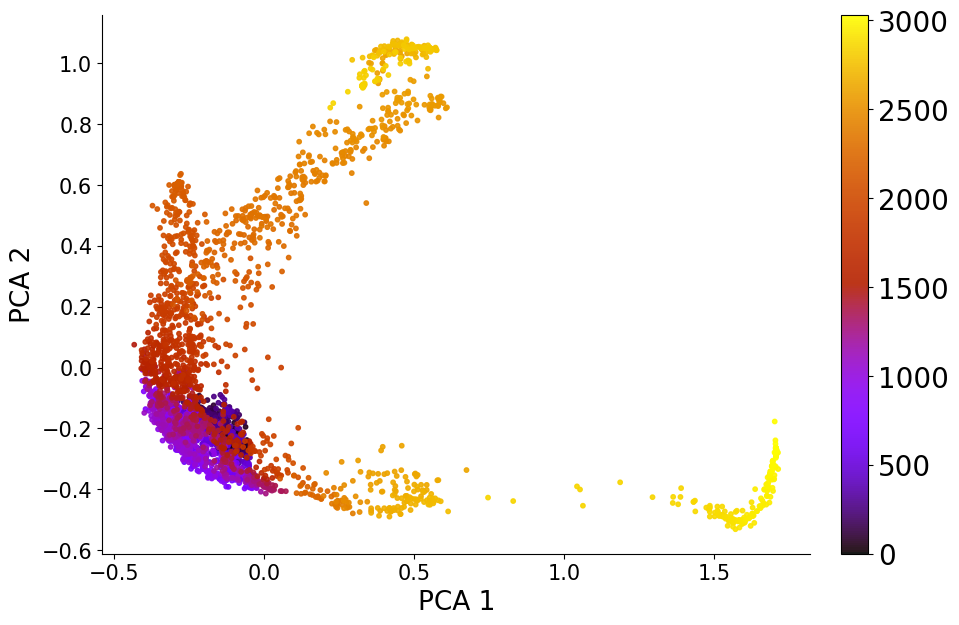

In [7]:
# infer pseudo-time
dpt_mtx = ti.dpt(np.concatenate((z_rna, z_atac), axis = 0), n_neigh = 10)
pt_infer = dpt_mtx[root_cell, :]
pt_infer[pt_infer.argsort()] = np.arange(len(pt_infer))
pt_infer = pt_infer/np.max(pt_infer)
# for scRNA-Seq batch
pt_infer_rna = pt_infer[:z_rna.shape[0]]
# for scATAC-Seq batch
pt_infer_atac = pt_infer[z_rna.shape[0]:]
utils.plot_latent_pt(z1 = z_rna_pca, z2 = z_atac_pca, pt1 = pt_infer_rna, pt2 = pt_infer_atac, mode = "joint", save = None, figsize = (10,7), axis_label = "PCA")
